In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("full_song_data.csv")
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo                      id  \
0          0.013400    0.0556   0.3890  156.985  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  115.080  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  218.050  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  186.948  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  147.988  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  duration_ms  time_signature  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx       124539               4   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p       224427               4   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy        98821               4   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu       123661               3   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3       123298               4   

                                      track_name  artist_name  
0                            Mercury: Retrograde   Ghostemane  
1                                      Pathology   Don Kenobi  
2                                       Symbiote        gizmo  
3  ProductOfDrugs (Prod. The Virus and Antidote)    Kamiyada+  
4                                          Venom  $uicideboy$

In [14]:
data = data[~data["uri"].duplicated(keep="first")]
df = data[~data["uri"].duplicated(keep="first")]
df.drop(['id','uri', 'track_name','artist_name'], axis=1, inplace=True)
FEATURE_COLUMNS = [col for col in df.columns if df[col].dtype != "object"]

df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42298         0.502   0.991    5    -4.333     0       0.2400      0.005540   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.013400    0.0556   0.3890  156.985       124539   
1              0.000000    0.1180   0.1240  115.080       224427   
2              0.000004    0.3720   0.0391  218.050        98821   
3              0.000000    0.1140   0.1750  186.948       123661   
4              0.000000    0.1660   0.5910  147.988       123298   
...                 ...       ...      ...      ...          ...   
42298          0.000198    0.4700   0.0797  150.029       200000   
42300          0.000345    0.1210   0.3940  150.013       269208   
42302          0.000242    0.3850   0.1240  154.935       234823   
42303          0.029600    0.0575   0.4880  150.042       323200   
42304          0.000055    0.4140   0.1340  155.047       162161   

       time_signature  
0                   4  
1                   4  
2                   4  
3                   3  
4                   4  
...               ...  
42298               4  
42300               4  
42302               4  
42303               4  
42304               4  

[35877 rows x 13 columns]

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

X, X.shape

(array([[ 1.2611313 ,  0.28227021, -0.92140084, ...,  0.38092331,
         -1.2493428 ,  0.10450132],
        [ 0.54300277, -1.45642248,  0.71999166, ..., -1.37540856,
         -0.28834494,  0.10450132],
        [ 1.38295668,  0.71017277, -0.10070459, ...,  2.94029345,
         -1.49676934,  0.10450132],
        ...,
        [-1.75244377,  0.32018562,  0.71999166, ...,  0.29500325,
         -0.18832758,  0.10450132],
        [-1.00866779,  0.86183444,  0.17286083, ...,  0.08992672,
          0.66192578,  0.10450132],
        [-0.67525098,  0.99183015,  0.99355708, ...,  0.29969742,
         -0.8873908 ,  0.10450132]]),
 (35877, 13))

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_values = range(2,21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.11/lib/p

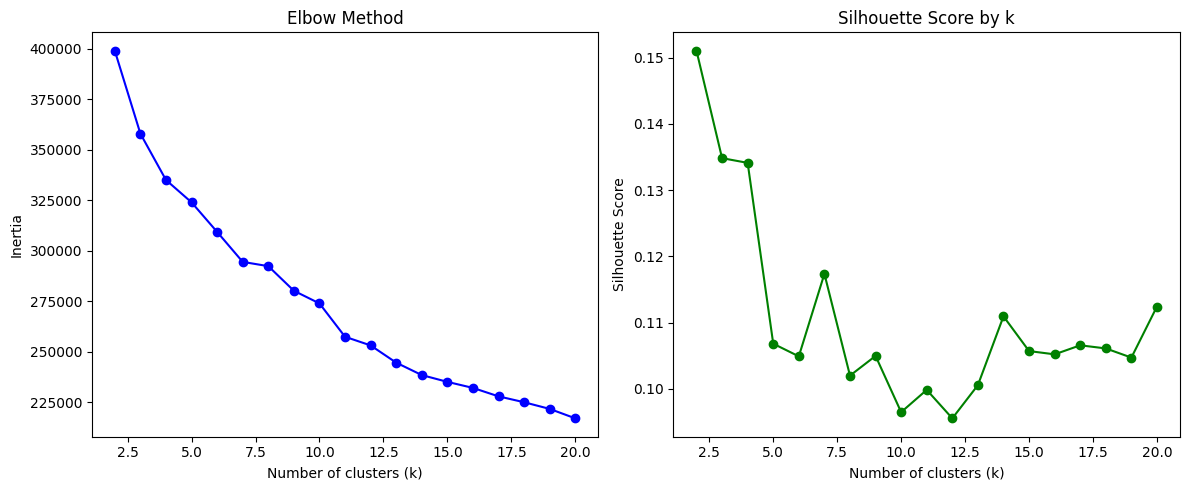

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')

plt.tight_layout()
plt.show()

In [7]:
dxs = [(inertias[i]-inertias[i-1])/(k_values[i]-k_values[i-1]) for i in range(len(k_values)-1)]
dxs

[-10108.526373605442,
 -41047.06782579975,
 -22925.261515907943,
 -11078.556667292316,
 -14635.250959059107,
 -14839.411882731772,
 -2102.383716088545,
 -12180.620275942085,
 -6268.873998432828,
 -16504.651578831894,
 -4278.0721025891835,
 -8535.842289557913,
 -6145.099363273097,
 -3360.952370266634,
 -2992.5594902355224,
 -4179.128848586348,
 -2913.6564037435164,
 -3299.915522988187]

In [17]:
# optimal k = 9
kmeans = KMeans(n_clusters=9, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X)
data['cluster_label'] = kmeans.fit_predict(X)
df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.11/lib/p

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42298         0.502   0.991    5    -4.333     0       0.2400      0.005540   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.013400    0.0556   0.3890  156.985       124539   
1              0.000000    0.1180   0.1240  115.080       224427   
2              0.000004    0.3720   0.0391  218.050        98821   
3              0.000000    0.1140   0.1750  186.948       123661   
4              0.000000    0.1660   0.5910  147.988       123298   
...                 ...       ...      ...      ...          ...   
42298          0.000198    0.4700   0.0797  150.029       200000   
42300          0.000345    0.1210   0.3940  150.013       269208   
42302          0.000242    0.3850   0.1240  154.935       234823   
42303          0.029600    0.0575   0.4880  150.042       323200   
42304          0.000055    0.4140   0.1340  155.047       162161   

       time_signature  cluster_label  
0                   4              4  
1                   4              8  
2                   4              2  
3                   3              2  
4                   4              4  
...               ...            ...  
42298               4              3  
42300               4              2  
42302               4              2  
42303               4              3  
42304               4              2  

[35877 rows x 14 columns]

In [18]:
from sklearn.decomposition import PCA

# 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

data['pca_x'] = X_pca[:, 0]
data['pca_y'] = X_pca[:, 1]
data['pca_z'] = X_pca[:, 2]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_base.py:149: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_base.py:149: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_base.py:149: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=data['pca_x'],
    y=data['pca_y'],
    z=data['pca_z'],
    mode='markers',
    marker=dict(
        size=5,
        color=data['cluster_label'],
        colorscale='Rainbow',
        opacity=0.8
    ),
    text=data['track_name'] + ' - ' + data['artist_name'],
    hoverinfo='text'
)])

fig.show()

In [20]:
FEATURE_COLUMNS = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
]
FEATURE_MATRIX = data[FEATURE_COLUMNS].values
SCALED_FEATURE_MATRIX = scaler.transform(FEATURE_MATRIX)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
data.to_csv('clustered_data.csv',index=False)

In [22]:
import joblib
joblib.dump({
    "data": data,
    "uris": data['uri'],
    "features": SCALED_FEATURE_MATRIX,
    "kmeans": kmeans,
    "scaler": scaler,
}, "ml_bundle.joblib")

['ml_bundle.joblib']